<a href="https://colab.research.google.com/github/santipop1/AdvancedIA/blob/main/SegundoBloque/Notebook7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, TimeDistributed
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from math import sqrt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
np.random.seed(7)
tf.random.set_seed(7)

In [ ]:
csv_path="train.csv"
train = pd.read_csv(csv_path, parse_dates=['date'])

#filtro una serie
train = train.query("store == 1 and item == 1").copy().sort_values('date')
print(train.head())
print("tamañito: ", len(train))

        date  store  item  sales
0 2013-01-01      1     1     13
1 2013-01-02      1     1     11
2 2013-01-03      1     1     14
3 2013-01-04      1     1     13
4 2013-01-05      1     1     10
tamañito:  1826


In [ ]:
def make_supervised_windows(series: np.ndarray,window: int, lag:int):
  x, y = [],[]
  for i in range(window, len(series)-lag):
    x.append(series[i-window:i+1])
    y.append(series[i+lag])
  return np.array(x), np.array(y)


window = 29
lag = 1

x, y = make_supervised_windows(train['sales'].values, window, lag)
print(x.shape, y.shape)

(1796, 30) (1796,)


In [ ]:
cut = int(len(x)*.8)
x_train, x_test = x[:cut], x[cut:]
y_train, y_test = y[:cut], y[cut:]

scaler_x = StandardScaler().fit(x_train)
scaler_y = StandardScaler().fit(y_train.reshape(-1,1))

x_train_s = scaler_x.transform(x_train)
x_test_s = scaler_x.transform(x_test)
y_train_s = scaler_y.transform(y_train.reshape(-1,1)).ravel()
y_test_s = scaler_y.transform(y_test.reshape(-1,1)).ravel()

print("X_train_s:", x_train.shape)
print("Y_train_s:", y_train.shape)
print("X_test_s:", x_test.shape)
print("Y_test_s:", y_test.shape)


x_train_3d = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_3d = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)





X_train_s: (1436, 30)
Y_train_s: (1436,)
X_test_s: (360, 30)
Y_test_s: (360,)


In [ ]:
#CNN 1D
model_cnn = Sequential([
    Conv1D(filters=32, kernel_size=3 ,activation='relu', input_shape=(window+1,1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1)
])

model_cnn.compile(optimizer='adam', loss='mse')
model_cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 28, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 448)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │        14,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,529 (56.75 KB)

 Trainable params: 14,529 (56.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_cnn = model_cnn.fit(x_train_3d,y_train_s,epochs=50,batch_size=32,verbose=1)


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 19.6301
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2899
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9947
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8442
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7935
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7713
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7512
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7348
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7238
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7163
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7117
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7107
Epoch 13/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7076
Epoch 14/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7034
Epoch 15/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6971
Epoch 16/50
45/45 

In [ ]:
pred_cnn_s = model_cnn.predict(x_test_3d).ravel()
pred_cnn = scaler_y.inverse_transform(pred_cnn_s.reshape(-1,1)).ravel()
print("RMSE:", sqrt(mean_squared_error(y_test, pred_cnn)))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
RMSE: 5.48578401816416


In [ ]:
#LSTM

model_lstm = Sequential([
    LSTM(32, activation='relu', input_shape=(window+1,1)),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_lstm = model_lstm.fit(x_train_3d,y_train_s,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 1.9985
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6756
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6492
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.6301
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.6193
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.6131
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6071
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.6058
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.6016
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.5999
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.5955
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5958
Epoch 13/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.5962
Epoch 14/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.5923
Epoch 15/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.5911
Epoc

In [ ]:
pred_lstm_s = model_lstm.predict(x_test_3d).ravel()
pred_lstm = scaler_y.inverse_transform(pred_lstm_s.reshape(-1,1)).ravel()
print("RMSE:", sqrt(mean_squared_error(y_test, pred_lstm)))


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
RMSE: 5.786064164281588


In [ ]:
#CNN + LSTM

subseq = 5
assert (window+1) % subseq == 0
steps_per_subseq = (window+1) // subseq

Xtr4 = x_train_3d.reshape((len(x_train_3d),subseq,steps_per_subseq,1))
Xva4 = x_test_3d.reshape((len(x_test_3d),subseq,steps_per_subseq,1))


model_cnn_lstm = Sequential([
    TimeDistributed(Conv1D(filters=32, kernel_size=3 ,activation='relu'),
    input_shape=(subseq,steps_per_subseq,1)),
    TimeDistributed(MaxPooling1D(2)),
    TimeDistributed(Flatten()),
    LSTM(32, activation='tanh'),
    Dense(1)
])
model_cnn_lstm.compile(optimizer='adam', loss='mse')
model_cnn_lstm.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed                │ (None, 5, 4, 32)       │           128 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 5, 2, 32)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 5, 64)          │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,577 (49.13 KB)

 Trainable params: 12,577 (49.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_cnn_lstm = model_cnn_lstm.fit(Xtr4,y_train_s,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.8752
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6448
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5992
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5981
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5864
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5786
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5736
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5686
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5634
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5597
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5552
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5504
Epoch 13/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5463
Epoch 14/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5415
Epoch 15/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5373
Epoch 16/50
45/45 ━

In [ ]:
#Xva4 is the thist samples
pred_cnn_lstm_s = model_cnn_lstm.predict(Xva4).ravel()
pred_cnn_lstm = scaler_y.inverse_transform(pred_cnn_lstm_s.reshape(-1,1)).ravel()
print("RMSE:", sqrt(mean_squared_error(y_test, pred_cnn_lstm)))

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
RMSE: 5.534782876267754


In [ ]:
#plotting results

import matplotlib.pyplot as plt

rmse_cnn = sqrt(mean_squared_error(y_test, pred_cnn))
rmse_lstm = sqrt(mean_squared_error(y_test, pred_lstm))
rmse_cnn_lstm = sqrt(mean_squared_error(y_test, pred_cnn_lstm))

print("Summaty RSME")
print("CNN:", rmse_cnn)
print("LSTM:", rmse_lstm)
print("CNN + LSTM:",rmse_cnn_lstm)


Summaty RSME
CNN: 5.48578401816416
LSTM: 5.786064164281588
CNN + LSTM: 5.534782876267754


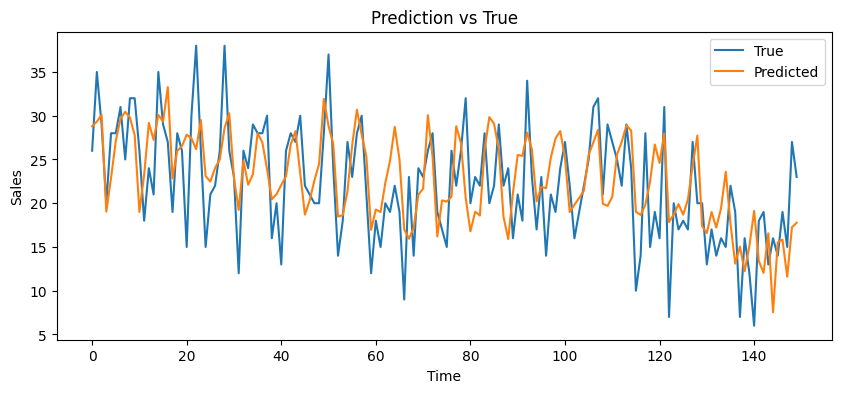

In [ ]:
y_true = y_test
y_pred = pred_cnn_lstm

k = 150 if len(y_true) > 150 else len(y_true)

plt.figure(figsize=(10, 4))
plt.plot(y_true[-k:], label="True")
plt.plot(y_pred[-k:], label="Predicted")
plt.title("Prediction vs True")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.show()